<a href="https://colab.research.google.com/github/KaustubhKhulbe/RoboticsMath/blob/main/2021_Intake_Counterbalancing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2021 Intake Counterbalancing

###Purpose
This notebook is meant to provide calculations and visuals necessary to decently counter balance our 2020-2021 intake. This is not going to be perfect counter balancing, since it is a four bar and we are using the logic for a pivot, but it is going to be close enough to do the job

###What this will contain

- Energy Calculations to find minimum pneumatic
- Graphing the torque of gravity, pneumatic, and spring to make sure torque of pneumatic + torque of spring > torque of gravity
- Graph the speed of pneumatic as a function of time

Import statements

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

General Inputs

In [ ]:
arm = np.array([4., 7.]) #vector, example: from (0,0) to (5,5)
mass = 2 #lb

Pneumatic Inputs

In [ ]:
bore_size = 0.75 #in
fixed_mount = np.array([0., 3.]) #point location
pneumatic_mount = [1., 1.75]
pressure = 60 #psi

Spring Inputs

In [ ]:
spring_const = 1
spring_fixed_mount = np.array([0., 6.]) #point location
spring_mount_distance = 5 #in

Gravity Inputs 

This is just a big array taken from some code Sam had made : https://colab.research.google.com/drive/1dHbv9q_Eq7CYLoZN8mkhxFPZak7_4m8_?usp=sharing

In [ ]:
gravity_angles = np.array([30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0])
gravity_torques = np.array([16.80345445361327, 12.549612100639946, 9.123284646605955, 6.371417178126761, 4.172716242789196, 2.430308730622665, 1.0662742522428428, 0.017529427634463385, 0.7673006284076087, 1.3302819896469065, 1.7060280131920285, 1.9231461490567185, 2.0053738490227144, 1.972476344087232, 1.8409605986522737, 1.624646312283424, 1.3351249677752557, 0.9821306073955272, 0.573840550576715, 0.11712014614316306, 0.3822774764601537, 0.9195480866565571, 1.4907027393947108, 2.0924585819232147, 2.7221499215851974, 3.377656291133273, 4.057344969161585, 4.760026004569943, 5.484918290965549, 6.231625668719928, 7.000122424300823, 7.790747932000541, 8.60421056614176, 9.441601428818359, 10.30441892140304, 11.194605779265656, 12.114600945724565, 13.067409664939238, 14.056696544336335, 15.086908256193498, 16.163435294080344, 17.29282621242737, 18.483073764944354, 19.7440014897586, 21.087793549306276, 22.529733482607334, 24.08925520610555, 25.791473770392283, 27.66947676564032, 29.767866278503366, 32.148446086094985, 34.89977987392832, 38.15417710982772, 42.12006160366649, 47.149472017853796])

intermediate calculations

`pneumatic_len` is just the distance from pivot to pneumatic mount

`F_p` is the scalar of the force applied by the pneumatic

In [ ]:
pneumatic_len = np.linalg.norm(pneumatic_mount)

F_p = pressure * np.pi * bore_size ** 2 / 4 #lb-in

arm_len = np.linalg.norm(arm)


MOI = (mass * 0.453592) * (pneumatic_len * 0.0254) ** 2 #kg*m^2 

print(F_p)


26.50718801466388


Visalize Setup

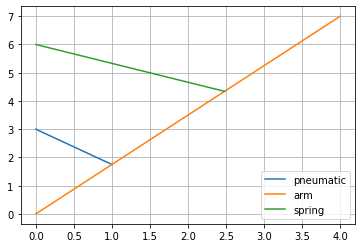

In [ ]:
p_x = [fixed_mount[0], pneumatic_mount[0]]
p_y = [fixed_mount[1], pneumatic_mount[1]]

a_x = [0, arm[0]]
a_y = [0, arm[1]]

spring_mount = (arm / np.linalg.norm(arm)) * spring_mount_distance

s_x = [spring_fixed_mount[0], spring_mount[0]]
s_y = [spring_fixed_mount[1], spring_mount[1]]

plt.plot(p_x, p_y, label="pneumatic")
plt.plot(a_x, a_y, label="arm")
plt.plot(s_x, s_y, label="spring")

plt.grid()
plt.legend()

This function gets a new pneumatic mount, `mount`, and using it, it finds the torque of the pneumatic.

$T = rxF$ 
$rxF = ||r||*||F||*sin(\theta)$

$||r||$ and $||F||$ are straightforward (just magnitude) but $sin(\theta)$ is more tedious

Given
- `theta` which is the angle between arm and vector from (0,0) to `fixed_mount` and ||`fixed_mount`|| is distance from (0,0) to `fixed_mount`
- `distance` is length from `fixed_mount` to `pneumatic_mount`

The $sin(\alpha)$ is given as $\frac{||fixed mount|| * sin(\theta)}{distance}$
from this we can just plug in all our variables to get `T_p`


In [ ]:
def getPneumaticTorque(mount):
  theta_1 = np.arctan2(mount[0], mount[1])
  theta_2 = np.arctan2(fixed_mount[0], fixed_mount[1])

  theta = theta_2 - theta_1
  
  distance = math.sqrt( (mount[0] - fixed_mount[0]) ** 2 + (mount[1] - fixed_mount[1]) ** 2 ) 
  sin_a = (np.linalg.norm(fixed_mount) * np.sin(theta))/distance

  T_p = F_p * pneumatic_len * sin_a
  return np.linalg.norm(T_p)

This one is much simpler

Given
- `unit` which is the spring mounted on `arm_new` as a vector
- `dist` the distance between the spring mount and the pivot
- `F_s` is simple their cross product

In [ ]:
def getSpringTorque(arm_new):
  unit = (arm_new / np.linalg.norm(arm_new)) * spring_mount_distance
  dist = (spring_fixed_mount - unit)

  F_s = spring_const * dist
  return np.linalg.norm(np.cross(F_s, unit))

This iterates from `start` to `end` and gets the torque of each and stores it in an array

In [ ]:
start = (int) (gravity_angles[0])
end = (int) (gravity_angles[len(gravity_angles) - 1])


x = np.linspace(start, end, end - start + 1)
pneumatic_vals = x.copy()
spring_vals = x.copy()

for i in range(len(x)):
  arm_new = np.array([arm_len * np.cos(np.radians(180 - x[i])), arm_len * np.sin(np.radians(180 - x[i]))])
  pneumatic = (arm_new / np.linalg.norm(arm_new)) * pneumatic_len
  pneumatic_vals[i] = getPneumaticTorque(pneumatic)
  spring_vals[i] = getSpringTorque(arm_new)

This just graphs everything we have so far
- pneumatic torque
- gravitational torque
- spring torque

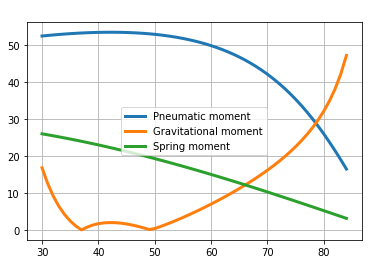

In [ ]:
plt.title("Pneumatic v. Gravitational moment", c="white")

plt.plot(x, pneumatic_vals, label="Pneumatic moment", linewidth=3)
plt.plot(x, gravity_torques, label="Gravitational moment", linewidth=3)
plt.plot(x, spring_vals, label="Spring moment", linewidth=3)

plt.grid()
plt.legend()

To choose the right pneumatic, this equation must be held:

`pneumatic_energy` + `spring_energy` > `gravity_energy`

We can calculate this since energy is simply the integral of torque, which we have

Spring integral calculation

In [ ]:
begin = start
desired = end

energy_spring = 0

while begin < desired:
  arm_new = np.array([arm_len * np.cos(np.radians(begin)), arm_len * np.sin(np.radians(180 - begin))])
  energy_spring += getSpringTorque(arm_new) * 0.001 
  begin += 0.001
print(energy_spring)

850.0319468756057


Gravity integral calculation

In [ ]:
energy_gravity = 0
for i in gravity_torques:
  energy_gravity += i
print(energy_gravity)

625.9839301873458


pneumatic integral calculation (not needed but just there)

In [ ]:
begin = start
desired = end

energy_p = 0

while begin < desired:
  arm_new = np.array([arm_len * np.cos(np.radians(begin)), arm_len * np.sin(np.radians(180 - begin))])
  pneumatic = (arm_new / np.linalg.norm(arm_new)) * pneumatic_len
  energy_p += getPneumaticTorque(arm_new) * 0.001 
  begin += 0.001

print(energy_p)

747.7968437024577


QUICK NOTE: This outputs a bore and a stroke but you only need one. Let's say you have a bore size, then you input it at the top and roll with that. But let's say we have stroke length. we input that into `stroke` and use the bore size output

In [ ]:
net_energy_needed = np.abs(energy_gravity - energy_spring)

net_energy_needed /= 2 #This is because we plan on having two pneumatic so each would do only half the work

print(net_energy_needed)
print(F_p)

stroke = 6

stroke_required = net_energy_needed * 1.75 / F_p

F_required = net_energy_needed * 1.75 / stroke
print(F_p)
bore = math.sqrt(4 * F_required / (60 * np.pi))


print("STROKE REQUIRED: " + (str)(stroke_required))
print("BORE REQUIRED: " + (str)(bore))

112.02400834412998
26.50718801466388
26.50718801466388
STROKE REQUIRED: 7.395805790254941
BORE REQUIRED: 0.8326804866432267


In [ ]:
start = (int) (gravity_angles[0])
end = (int) (gravity_angles[len(gravity_angles) - 1])

x = np.linspace(start, end, end - start + 1)
pneumatic_vals = x.copy()
net = x.copy()

for i in range(len(x)):
  arm_new = np.array([arm_len * np.cos(np.radians(180 - x[i])), arm_len * np.sin(np.radians(180 - x[i]))])
  pneumatic = (arm_new / np.linalg.norm(arm_new)) * pneumatic_len
  pneumatic_vals[i] = getPneumaticTorque(pneumatic)
  #print((str)(getSpringTorque(arm_new)) + ", " + (str)(gravity_torques[i]))
  net[i] = np.abs(gravity_torques[i] - getSpringTorque(arm_new))

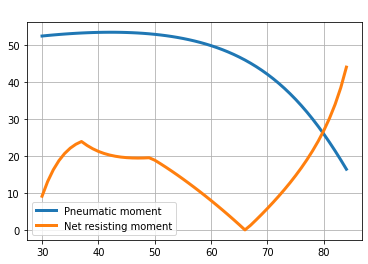

In [ ]:
plt.title("Pneumatic v. Gravitational moment", c="white")

plt.plot(x, pneumatic_vals, label="Pneumatic moment", linewidth=3)
plt.plot(x, net, label="Net resisting moment", linewidth=3)

plt.grid()
plt.legend()

Process to get radians travelled / unit of time

$T = MOI * acceleration$

can calculate the angular acceleration

Integrate A(t) to get V(t), then integrate that to get S(t) where s is in radians/unit of time

In this case, output will be radians/interval

I am also returning velocity since I am using the approximation: $f(x_i) = y + ∆y = y'(x) * ∆x$ which means that I will need to keep adding velocity (since I'm integrating)

The function below returns the change in velocity and radians which is later added to the current angle and velocity

Calculus!

In [ ]:
def getRadianTravelled(torque, angle, velocity, interval):
  angular_acceleration = torque / MOI

  change_in_v = angular_acceleration * interval
  v_new = velocity + change_in_v

  change_in_radians = velocity * interval

  return np.array([change_in_radians, change_in_v])

This is just looping through until we have reached the angle.

1) Get a new pivot from `curr_angle` 

2) using it's unit vector, get the `pneumatic`

3) get the torque at that `pneumatic` using previously defined function

4) get the velocity and the angle travelled from above function

5) store these in an array which we will plot later

6) add this to all variables to update


In [ ]:

desired_angle = np.radians(end)

curr_angle = np.radians(start)
curr_v = 0.
curr_t = 0.

y = []
t = []

while(curr_angle < desired_angle):
  arm_new = np.array([arm_len * np.cos(np.pi - curr_angle), arm_len * np.sin(np.pi - curr_angle)]) 

  pneumatic = (arm_new / np.linalg.norm(arm_len)) * arm_len

  torque = getPneumaticTorque(pneumatic)


  arr = getRadianTravelled(torque, curr_angle, curr_v, 0.0001)
  curr_angle += arr[0]
  curr_v += arr[1]

  curr_t += 0.0001
  t.append(curr_t)

  y.append(curr_angle)

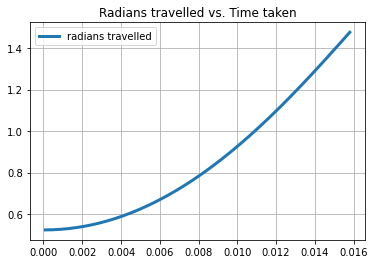

In [ ]:
plt.plot(t, y, label="radians travelled", linewidth=3)
plt.title("Radians travelled vs. Time taken")
plt.grid()
plt.legend()